In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def human_format(x):
    sigpart = 0
    suffix = ""
    if x < 1000:
        return "{:.3g}".format(x)
    elif x < 1000000:
        sigpart = x / 1000
        suffix = "k"
    elif x < 1000000000:
        sigpart = x / 1000000
        suffix = "M"
    else:
        sigpart = x / 1000000000
        suffix = "B"
    return "{:.3g}{}".format(sigpart, suffix)

In [5]:
df = pd.read_csv("../finalresults/druid.csv")

In [6]:
datasets = ["milan5"]
datasetnames = [
    "Milan 5 Day"
]
sketches = [
    ("sum", 1),
    ("moments", 10),
    ("stree", 10),
    ("stree", 100),
    ("stree", 1000)
]
sketchnames = [
    "sum",
    "moments",
    "stree:10",
    "stree:100",
    "stree:1000"
]
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

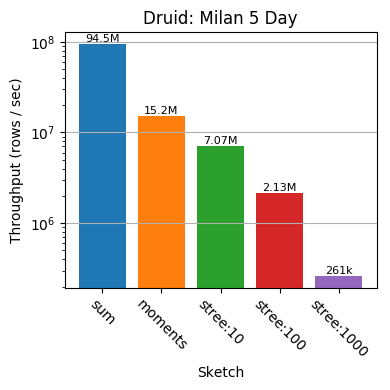

In [14]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, sharey=True, dpi=100)
for di in range(len(datasets)):
    dname = datasets[di]
    data = df[(df.Dataset == dname)]
    xlocs = np.arange(0, len(sketches))
    ys = (data.Rows) / data.Time
    ax.bar(
        xlocs,
        height=ys,
        log=True,
        color = ["C0", "C1", "C2", "C3", "C4"]
    )
    rects = ax.patches
    for rect, label in zip(rects, ys):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2, 
            height,
            human_format(label),
            ha='center', va='bottom', size = 8,
        )

    ax.set_xticks(xlocs)
    ax.set_xticklabels(sketchnames, rotation=-45)
    ax.yaxis.grid(True)
    ax.set_title("Druid: "+datasetnames[di])
    if di == 0:
        ax.set_ylabel("Throughput (rows / sec)")
#     ax.set_ylim(0.005, 10)
    ax.set_xlabel("Sketch")
plt.tight_layout()
plt.savefig("druid.pdf")